In [1]:
import numpy as np

sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/home/juan/Documents/Projects//Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
import matplotlib.pyplot as plt
import time
import sys
from scipy import integrate
import concurrent.futures
import functools
from traceback import print_exc
import os
from datetime import datetime
import gc
import pandas as pd


In [2]:

    ##########################
    ##########################
    # parameters
    ##########################
    ##########################

    # # #electronic parameters
    J=2*5.17 #in mev
    tp1=568/J #in units of Js\
    tp2=-tp1*108/568 #/tpp1
    ##coupling 
    U=4000/J
    g=100/J
    Kcou=g*g/U
    # fill=0.67 #van hove
    fill=0.5
    

    #rotated FS parameters
    # J=2*5.17 #in mev
    # tp1=568/J #in units of Js\
    # tp2=tp1*0.258 #/tpp1
    # ##coupling 
    # U=4000/J
    # g=100/J
    # Kcou=g*g/U
    # # fill=0.67 #van hove
    # fill=0.35

    ##params quasicircular and circular FS
    # J=2*5.17 #in mev
    # tp1=568/J #in units of Js
    # tp2=0.065*tp1
    # ##coupling 
    # U=4000/J
    # g=100/J
    # Kcou=g*g/U
    # fill=0.1

    ##########################
    ##########################
    # Geometry/Lattice
    ##########################
    ##########################

    Npoints=1000
    Npoints_int_pre, NpointsFS_pre=6000,600
    save=True
    l=Lattice.TriangLattice(Npoints_int_pre, save)
    # [KX,KY]=l.read_lattice(sq=1)
    # [KX,KY]=l.Generate_lattice_SQ()
    Vol_rec=l.Vol_BZ()
    l2=Lattice.SQLattice(Npoints, save)
    # [KX2,KY2]=l2.Generate_lattice()
    Vol_rec2=l2.Vol_BZ()
    
    
    
    # ##########################
    # ##########################
    # # Fermi surface and structure factor
    # ##########################
    # ##########################

    ed=Dispersion.Dispersion_TB_single_band([tp1,tp2],fill)


Machine arg is, 
Machine arg is, 
started calculating filling for chemical potential and dispersion parameters TB_single_band..
Machine arg is, 
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
Machine arg is, 
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
norm of Dos, 42.97093206665365 45.58575006211245
sum of the hist, normed? 42.97093206665365
finished calculating filling for chemical potential
Filling: 0.49313107609556217 .... chemical potential: 23.93702777725383
Machine arg is, 
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
sum of the hist, normed? 0.9999999999999923


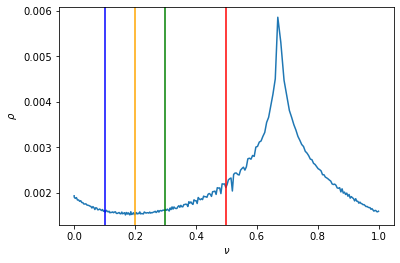

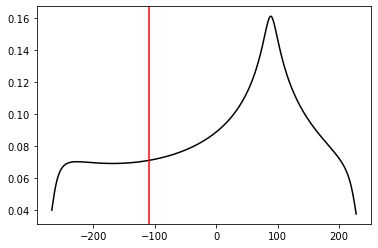

In [3]:
    # plt.plot(ed.nn,ed.Dos, c='k')
    plt.plot(ed.dens2,ed.valt)
    plt.axvline(0.1, c='b')
    plt.axvline(0.2, c='orange')
    plt.axvline(0.3, c='g')
    plt.axvline(0.5, c='r')
    plt.ylabel(r"$\rho$")
    plt.xlabel(r"$\nu$")
    # plt.savefig("Dos.png")
    plt.show()
    
    plt.plot(ed.earr,ed.Dos, c='k')
    
    indemin=np.argmin((ed.nn-0.25)**2)
    mu=ed.earr[indemin]
    plt.axvline(mu, c='r')
    # plt.savefig("Dos_E.png")
    plt.show()
    
    
    
    # [dens2,bins,valt,f2 ]=ed.DOS_2(1200)
    # plt.plot(bins,valt, c='k')
    # plt.axvline(mu, c='r')
    # plt.savefig("Dos_E.png")
    # plt.close()
    

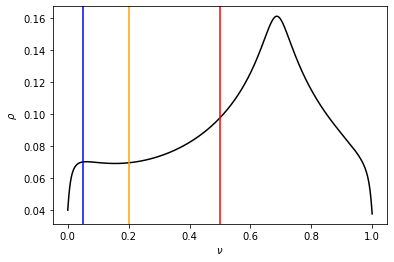

In [4]:
    plt.plot(ed.nn,ed.Dos, c='k')
    # plt.plot(ed.dens2,ed.valt)
    plt.axvline(0.05, c='b')
    plt.axvline(0.2, c='orange')
    plt.axvline(0.5, c='r')
    plt.ylabel(r"$\rho$")
    plt.xlabel(r"$\nu$")
    # plt.savefig("Dos.png")
    plt.show()
    


In [81]:
def DOS(size_E, Npoi_ints):
    #DOMAIN OF THE DOS
    minE=ed.bandmin-0.001*ed.bandwidth
    maxE=ed.bandmax+0.001*ed.bandwidth
    earr=np.linspace(minE,maxE,size_E)
    #INTEGRATION LATTICE
    latt_int=Lattice.TriangLattice(Npoi_ints, False, ed.Machine) #temp grid for integrating and getting filling
    
    # [KX,KY]=l.Generate_lattice()
    [KX,KY]=latt_int.read_lattice()
    Vol_rec=latt_int.Vol_BZ()
    ds=Vol_rec/np.size(KX)
    #DISPERSION FOR INTEGRAL: choose dispersion
    energy_k = ed.Disp(KX,KY)
    #parameter for delta func approximation
    epsil=0.001*ed.bandwidth
    ##DOS 
    Dos=[]
    for i in earr:
        dosi=np.sum(ed.deltad(energy_k-i,epsil))*ds
        Dos.append(dosi)
        
    de=earr[1]-earr[0]
    Dos=np.array(Dos)/ed.latt_int.VolBZ
    print("norm of Dos,", np.sum(Dos)*de)
    
    #FILLING FOR EACH CHEMICAL POTENTIAL
    ndens=[]
    for mu_ind in range(size_E):
        
        N=np.trapz(Dos[0:mu_ind])*de
        ndens.append(N)
    nn=np.array(ndens)
    nn=nn/nn[-1]
    
    print("sum of the hist, normed?", np.sum(Dos)*de)
    return [nn,earr,Dos]

In [83]:
[nn,earr,Dos]=DOS(size_E=400, Npoi_ints=2000)

Machine arg is, 
reading lattice from... ./Lattices/KgridX2000.npy
reading lattice from... ./Lattices/KgridY2000.npy
norm of Dos, 0.9964831940045091
sum of the hist, normed? 0.9964831940045091


(0.001, 0.0055)

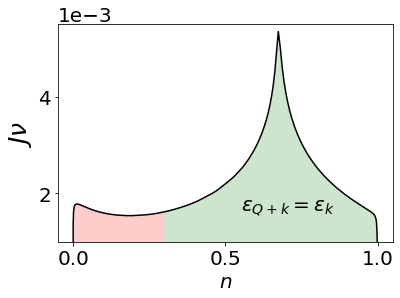

In [7]:
import matplotlib
font = {'size'   : 20}

matplotlib.rc('font', **font)

fig,ax =plt.subplots()
plt.plot(nn,Dos, c='k')
# plt.axvline(0.05, c='b')
# plt.axvline(0.2, c='orange')
# plt.axvline(0.5, c='r')
# plt.axvline(0.6, c='g')
plt.ylabel(r"$J \nu$ ",size=25)
plt.xlabel(r"$n$",size=20)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,-3))
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=3)
plt.text(0.55,0.00165,r'$\varepsilon_{Q+k}=\varepsilon_{k}$', size=20)

plt.xticks(size=20)
plt.yticks(size=20)
x=np.linspace(0,1,np.size(Dos))
mid=150
ax.fill_between(nn[:mid], 0, Dos[:mid], where=Dos[:mid] >0,facecolor='red', alpha=0.2)
ax.fill_between(nn[mid-1:], 0, Dos[mid-1:], where=Dos[mid-1:] >0,facecolor='green', alpha=0.2)
plt.ylim(1e-3,5.5e-3)

In [116]:
[KxFS,KyFS]=ed.FS_contour(NpointsFS_pre)

ed2=Dispersion.Dispersion_TB_single_band([tp1,tp2],0.05)
[KxFS2,KyFS2]=ed2.FS_contour(NpointsFS_pre)

# ed2=Dispersion.Dispersion_TB_single_band([tp1,tp2],0.2)
# [KxFS2,KyFS2]=ed2.FS_contour(NpointsFS_pre)

starting contour.....
finished contour..... 3.581648588180542
started calculating filling for chemical potential and dispersion parameters TB_single_band..
Machine arg is, 
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
Machine arg is, 
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
norm of Dos, 42.97093206665365 45.58575006211245
sum of the hist, normed? 42.97093206665365
finished calculating filling for chemical potential
Filling: 0.06097483973436045 .... chemical potential: -233.10534693634725
Machine arg is, 
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
sum of the hist, normed? 0.9999999999999923
starting contour.....
finished contour..... 3.1974165439605713


Machine arg is, CH1


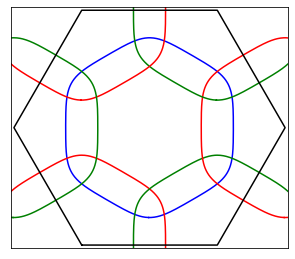

In [9]:
l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
plt.plot(KxFS,KyFS, c='b')
for i in range(6):
    if i%2==0:
        f='r'
    else:
        f='g'
    plt.plot(KxFS+vx[i],KyFS+vy[i], c=f)
plt.plot(vx,vy, c='k')
plt.ylim(np.min(vy)-0.1, np.max(vy)+0.1)
plt.xlim(np.min(vx)-0.1, np.max(vx)+0.1)
# plt.xlabel(r"$k_x$",size=20)
# plt.ylabel(r"$k_y$",size=20)
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=7)


plt.xticks([])
plt.yticks([])
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()


Machine arg is, CH1
Machine arg is, CH1


<ipython-input-15-eeaff1dfb594>:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


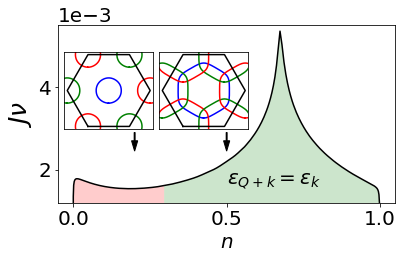

In [15]:
import matplotlib
font = {'size'   : 20}

matplotlib.rc('font', **font)

fig,ax =plt.subplots()
ax.plot(nn,Dos, c='k')
# plt.axvline(0.05, c='b')
# plt.axvline(0.2, c='orange')
# plt.axvline(0.5, c='r')
# plt.axvline(0.6, c='g')
ax.set_ylabel(r"$J \nu$ ",size=25)
ax.set_xlabel(r"$n$",size=20)
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,-3))
ax.locator_params(axis='y', nbins=4)
ax.locator_params(axis='x', nbins=3)
ax.text(0.5,0.00165,r'$\varepsilon_{Q+k}=\varepsilon_{k}$', size=20)

# ax.set_xticks(size=20)
# ax.set_yticks(size=20)
x=np.linspace(0,1,np.size(Dos))
mid=150
ax.fill_between(nn[:mid], 0, Dos[:mid], where=Dos[:mid] >0,facecolor='red', alpha=0.2)
ax.fill_between(nn[mid-1:], 0, Dos[mid-1:], where=Dos[mid-1:] >0,facecolor='green', alpha=0.2)
ax.set_ylim(1.2e-3,5.5e-3)

sizefigs=0.27
loc1=0.15
heightboth=0.5
extrabound=0.3


left, bottom, width, height = [loc1+sizefigs-0.05, heightboth, sizefigs, sizefigs]
ax2 = fig.add_axes([left, bottom, width, height])
l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
ax2.plot(KxFS,KyFS, c='b')
for i in range(6):
    if i%2==0:
        f='r'
    else:
        f='g'
    plt.plot(KxFS+vx[i],KyFS+vy[i], c=f)
ax2.plot(vx,vy, c='k')
ax2.set_ylim(np.min(vy)-extrabound, np.max(vy)+extrabound)
ax2.set_xlim(np.min(vx)-extrabound, np.max(vx)+extrabound)

plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=7)


ax2.set_xticks([])
ax2.set_yticks([])
plt.gca().set_aspect('equal', adjustable='box')


left, bottom, width, height = [loc1, heightboth, sizefigs, sizefigs]
ax3 = fig.add_axes([left, bottom, width, height])
l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
ax3.plot(KxFS2,KyFS2, c='b')
for i in range(6):
    if i%2==0:
        f='r'
    else:
        f='g'
    plt.plot(KxFS2+vx[i],KyFS2+vy[i], c=f)
ax3.plot(vx,vy, c='k')
ax3.set_ylim(np.min(vy)-extrabound, np.max(vy)+extrabound)
ax3.set_xlim(np.min(vx)-extrabound, np.max(vx)+extrabound)

plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=7)


ax3.set_xticks([])
ax3.set_yticks([])
plt.gca().set_aspect('equal', adjustable='box')
ax.arrow(.5,.0029, 0, -.0002,head_width = 0.02, head_length=0.00025,width = 0.003,ec ='black', color='black')
ax.arrow(.2,.0029, 0, -.0002,head_width = 0.02, head_length=0.00025,width = 0.003,ec ='black', color='black')

plt.tight_layout()
plt.savefig("./imgs/pap_figapp2.png", dpi=400, bbox_inches='tight')

Machine arg is, CH1
Machine arg is, CH1


<ipython-input-117-6fd731f43839>:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


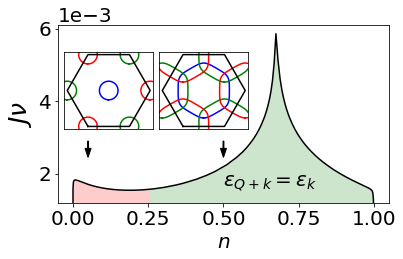

In [117]:
import matplotlib
font = {'size'   : 20}

matplotlib.rc('font', **font)

fig,ax =plt.subplots()
ax.plot(nn,Dos, c='k')
# plt.axvline(0.05, c='b')
# plt.axvline(0.2, c='orange')
# plt.axvline(0.5, c='r')
# plt.axvline(0.26, c='g')
ax.set_ylabel(r"$J \nu$ ",size=25)
ax.set_xlabel(r"$n$",size=20)
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,-3))
ax.locator_params(axis='y', nbins=4)
ax.locator_params(axis='x', nbins=5)
ax.text(0.5,0.00165,r'$\varepsilon_{Q+k}=\varepsilon_{k}$', size=20)

# ax.set_xticks(size=20)
# ax.set_yticks(size=20)
x=np.linspace(0,1,np.size(Dos))
mid=128
ax.fill_between(nn[:mid], 0, Dos[:mid], where=Dos[:mid] >0,facecolor='red', alpha=0.2)
ax.fill_between(nn[mid-1:], 0, Dos[mid-1:], where=Dos[mid-1:] >0,facecolor='green', alpha=0.2)
ax.set_ylim(1.2e-3,6.1e-3)

sizefigs=0.27
loc1=0.15
heightboth=0.5
extrabound=0.3


left, bottom, width, height = [loc1+sizefigs-0.05, heightboth, sizefigs, sizefigs]
ax2 = fig.add_axes([left, bottom, width, height])
l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
ax2.plot(KxFS,KyFS, c='b')
for i in range(6):
    if i%2==0:
        f='r'
    else:
        f='g'
    plt.plot(KxFS+vx[i],KyFS+vy[i], c=f)
ax2.plot(vx,vy, c='k')
ax2.set_ylim(np.min(vy)-extrabound, np.max(vy)+extrabound)
ax2.set_xlim(np.min(vx)-extrabound, np.max(vx)+extrabound)

plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=7)


ax2.set_xticks([])
ax2.set_yticks([])
plt.gca().set_aspect('equal', adjustable='box')


left, bottom, width, height = [loc1, heightboth, sizefigs, sizefigs]
ax3 = fig.add_axes([left, bottom, width, height])
l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
ax3.plot(KxFS2,KyFS2, c='b')
for i in range(6):
    if i%2==0:
        f='r'
    else:
        f='g'
    plt.plot(KxFS2+vx[i],KyFS2+vy[i], c=f)
ax3.plot(vx,vy, c='k')
ax3.set_ylim(np.min(vy)-extrabound, np.max(vy)+extrabound)
ax3.set_xlim(np.min(vx)-extrabound, np.max(vx)+extrabound)

plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=7)



ax3.set_xticks([])
ax3.set_yticks([])
plt.gca().set_aspect('equal', adjustable='box')
ax.arrow(.5,.0029, 0, -.0002,head_width = 0.02, head_length=0.00025,width = 0.003,ec ='black', color='black')
ax.arrow(.05,.0029, 0, -.0002,head_width = 0.02, head_length=0.00025,width = 0.003,ec ='black', color='black')

# ax.axvline(0.063, c='g')
# ax.axvline(nn[30], c='g', ls='--')
plt.tight_layout()
plt.savefig("./imgs/pap_figapp1.png", dpi=400, bbox_inches='tight')

(0.001, 0.0055)

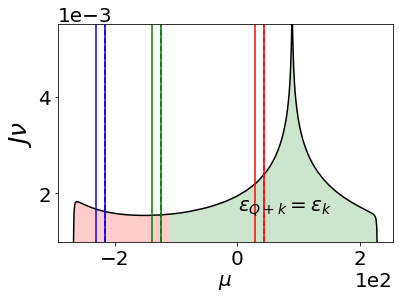

In [104]:
import matplotlib
font = {'size'   : 20}

matplotlib.rc('font', **font)

fig,ax =plt.subplots()
plt.plot(earr,Dos, c='k')
plt.axvline(earr[30], c='b')
plt.axvline(earr[30]+15, c='b')
plt.axvline(earr[42], c='b', ls='--')
plt.axvline(earr[238], c='r')
plt.axvline(earr[238]+15, c='r')
plt.axvline(earr[250], c='r', ls='--')
plt.axvline(earr[103], c='g')
plt.axvline(earr[103]+15, c='g')
plt.axvline(earr[115], c='g', ls='--')

# plt.axvline(0.2, c='orange')
# plt.axvline(0.5, c='r')

plt.ylabel(r"$J \nu$ ",size=25)
plt.xlabel(r"$\mu$",size=20)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,-3))
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=3)
plt.text(0.55,0.00165,r'$\varepsilon_{Q+k}=\varepsilon_{k}$', size=20)

plt.xticks(size=20)
plt.yticks(size=20)
x=np.linspace(0,1,np.size(Dos))
mid=128
ax.fill_between(earr[:mid], 0, Dos[:mid], where=Dos[:mid] >0,facecolor='red', alpha=0.2)
ax.fill_between(earr[mid-1:], 0, Dos[mid-1:], where=Dos[mid-1:] >0,facecolor='green', alpha=0.2)
plt.ylim(1e-3,5.5e-3)

In [121]:
m1=(Dos[250]-Dos[238])/(earr[250]-earr[238])
m2=(Dos[115]-Dos[103])/(earr[115]-earr[103])
m3=(Dos[42]-Dos[30])/(earr[42]-earr[30])
v1=Dos[238]
v2=Dos[103]
v3=Dos[30]

In [123]:
print(v1,v2,v3)
print(m1,m2,m3)

0.0021928077007395495 0.0015482010761976664 0.0016763630556556972
1.3449386619169152e-05 6.203585792597396e-07 -3.4314332176483707e-06


In [108]:
m3/m1

-0.2551367816847212

In [109]:
m3/m2

-5.531370617527407

In [118]:
Dos[238]/Dos[30]

1.3080744611625008

In [119]:
Dos[103]/Dos[30]

0.9235475996529277